In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
class Value:
    def __init__(self, value, children = (), op = '', label = ""):
        self.value = value
        self.prev = set(children)
        self.op = op
        self.label = label
        self.grad = 0.0

    def __repr__(self) -> str:
        return (f"(Value = {self.value})")
    
    def __add__ (self, other):
        out = Value(self.value + other.value, children=(self, other), op='+')
        return out
    
    def __mul__ (self, other):
        out = Value(self.value * other.value, children=(self, other), op='*')
        return out
    
    def tanh(self):
        x = self.value
        t = ((math.exp(2*x) - 1)/(math.exp(2*x) + 1))
        out = Value(t, (self, ), 'tanh')
        return out

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label='L'
print(L.value)
# print(d)
# print(d.op)

-8.0


In [4]:
from graphviz import Digraph
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v.prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr = {'rankdir': 'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = '{%s|data %.4f|grad %.4f}'%(n.label,n.value, n.grad), shape='record')
        if n.op:
            dot.node(name = uid + n.op, label = n.op)
            dot.edge(uid+n.op , uid)
        
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2.op)

    return dot

In [5]:
L.grad = 1.0

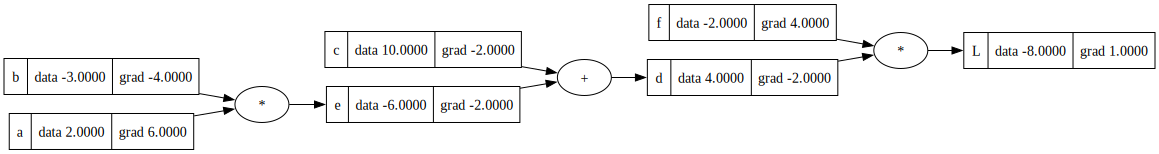

In [8]:
draw_dot(L)

In [7]:
L.grad = 1.0
d.grad = f.value
f.grad = d.value
dd_de, dd_dc = 1.0,1.0
e.grad = d.grad * dd_de
c.grad = d.grad * dd_dc
de_db, de_da = a.value, b.value
a.grad = d.grad * dd_de * de_da
b.grad = d.grad * dd_de * de_db


In [9]:

# forward prop in the direction of the gradients
alpha = 0.01
a.value += alpha * a.grad
b.value += alpha * b.grad
c.value += alpha * c.grad
f.value += alpha * f.grad

e = a * b
d = e + c
L = d * f

print(L)


(Value = -7.286496)


In [10]:
# test-function for grad_check
def xD():
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b 
    e.label = 'e'
    d = e + c 
    d.label = 'd'
    f = Value(-2.0, label='f')
    L1 = d * f 
    L1.label='L1'

    h = 0.0001

    a = Value(2.0+h, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b 
    e.label = 'e'
    d = e + c 
    d.label = 'd'
    f = Value(-2.0, label='f')
    L2 = d * f
    L2.label='L2'


    print((L2.value-L1.value)/h)

xD()


6.000000000021544


### Another Example

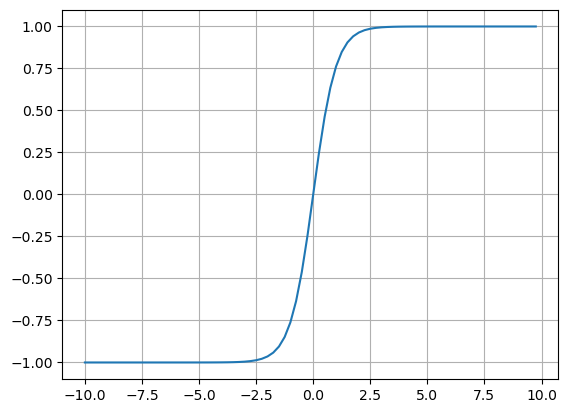

In [11]:
#visualizing tanh(x) activation function for ref.

x = np.arange(-10,10,0.25)
y = np.tanh(x)
plt.plot(x,y);plt.grid()

In [13]:
# inputs 
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'


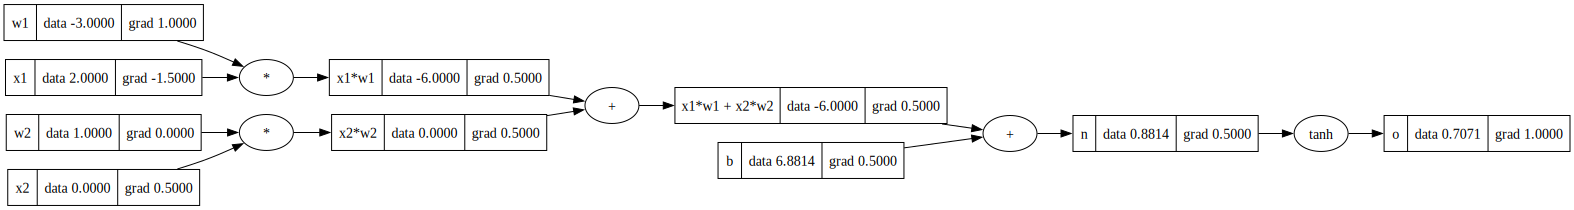

In [32]:
draw_dot(o)

In [31]:
o.grad = 1.0
# n.grad = 1 - (o.value)**2  #0.499999999
n.grad = 0.5

n_x1w1x2w2, n_b = 1.0, 1.0
x1w1x2w2.grad = n.grad * n_x1w1x2w2
b.grad = n.grad * n_b

x1w1x2w2_x1w1, x1w1x2w2_x2w2 = 1.0, 1.0
x1w1.grad = n.grad * n_x1w1x2w2 * x1w1x2w2_x1w1
x2w2.grad = n.grad * n_x1w1x2w2 * x1w1x2w2_x2w2

x1w1_x1, x1w1_w1 = w1.value, x1.value
w1.grad = n.grad * n_x1w1x2w2 * x1w1x2w2_x1w1 * x1w1_w1
x1.grad = n.grad * n_x1w1x2w2 * x1w1x2w2_x1w1 * x1w1_x1

x2w2_x2, x2w2_w2 = w2.value, x2.value
w2.grad = n.grad * n_x1w1x2w2 * x1w1x2w2_x2w2 * x2w2_w2
x2.grad = n.grad * n_x1w1x2w2 * x1w1x2w2_x2w2 * x2w2_x2

# Refresh the above cell to update gradients !!
